# Task-1


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd

In [90]:
df = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-3/Dataset1.csv",index_col=False)

In [91]:
df.head()

,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
encoder = LabelEncoder()
df_encoded = pd.DataFrame()

# Here we need to encode all the labels because each are non numeric features
for col in df.columns:
  df_encoded["Label_"+col] = encoder.fit_transform(df[col])

In [94]:
#Task 1: Try the algo on Dataset1 - LabelEncoding of features:
df_encoded.head()

,Label_Outlook,Label_Temp,Label_Humidity,Label_Wind,Label_Play
0,1,1,2,0,0
1,1,1,0,1,0
2,0,1,2,0,1
3,2,2,2,0,1
4,2,0,2,0,1


In [95]:
# #Task 1: Train test Division 80%-20%
# Random state is equal to roll no
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop("Label_Play",axis=1),df_encoded["Label_Play"],test_size=0.20, random_state=47)

In [96]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [98]:
gnb.fit(X_train,y_train)

GaussianNB()

In [99]:
target_pred = gnb.predict(X_test)

In [100]:
print(gnb.score(X_test,y_test))

0.6666666666666666


In [101]:
print(target_pred,y_test)
# From the above score we can say that 66.7% testing accuracy is correct
# As the model predicted 2 correct labels and falsely classified one 0 to 1.

[1 1 1] [1 0 1]


In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, target_pred)

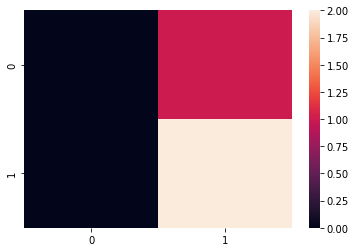

In [103]:
import seaborn as sns
sns.heatmap(cm)

In [104]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, target_pred, average=None,zero_division=0)
recall = recall_score(y_test, target_pred, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.         0.66666667]
recall: [0. 1.]


In [105]:
# Rainy->1 Overcast->0 Sunny->2
# High->1 Medium->2 Cold->0
# Low->1 Normal->2 High->0
# Windy->1 Not Windy->0

## Questions: For Task - 1

In [106]:
pred_1 = [[1,2,2,0]]
pred_2 = [[2,0,0,1]]

##### (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [107]:
print(gnb.predict(pred_1)) # We get output as 0 hence answer is no

[0]


##### (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’,and Wind = ’True’?

In [108]:
print(gnb.predict(pred_2)) # We get output as 0 hence answer is yes

[1]


##### (3) Accuracy , precision and recall of both Models?

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, target_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



# Task-2

In [110]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [111]:
X = cancer.data

In [114]:
df = pd.DataFrame(X)

In [122]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
targets = cancer.target

In [121]:
# As we can see there are no categorical features in the dataset hence there is no need of
# OneHotEncode The lables.

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(),targets,test_size=0.40, random_state=47)

In [131]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

In [132]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [134]:
gnb.fit(X_train,y_train)

GaussianNB()

In [137]:
gnb.score(X_test,y_test)*100 # Accuracy is 93.4%

93.42105263157895

In [138]:
predicted_label = gnb.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_label)

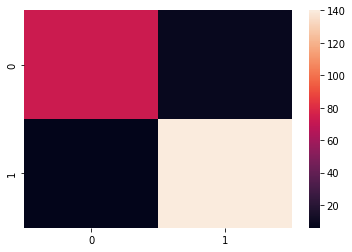

In [140]:
import seaborn as sns
sns.heatmap(cm)

In [141]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, predicted_label, average=None,zero_division=0)
recall = recall_score(y_test, predicted_label, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.92405063 0.93959732]
recall: [0.8902439  0.95890411]


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_label,zero_division=0)) # Classification Report for all class labels.

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        82
           1       0.94      0.96      0.95       146

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.93       228
weighted avg       0.93      0.93      0.93       228



In [145]:
df_temp = pd.DataFrame(targets)

In [146]:
df_temp.value_counts() # We have imbalanced dataset to some extent hence Accuracy is not a best measure to evaluate the model.

1    357
0    212
dtype: int64